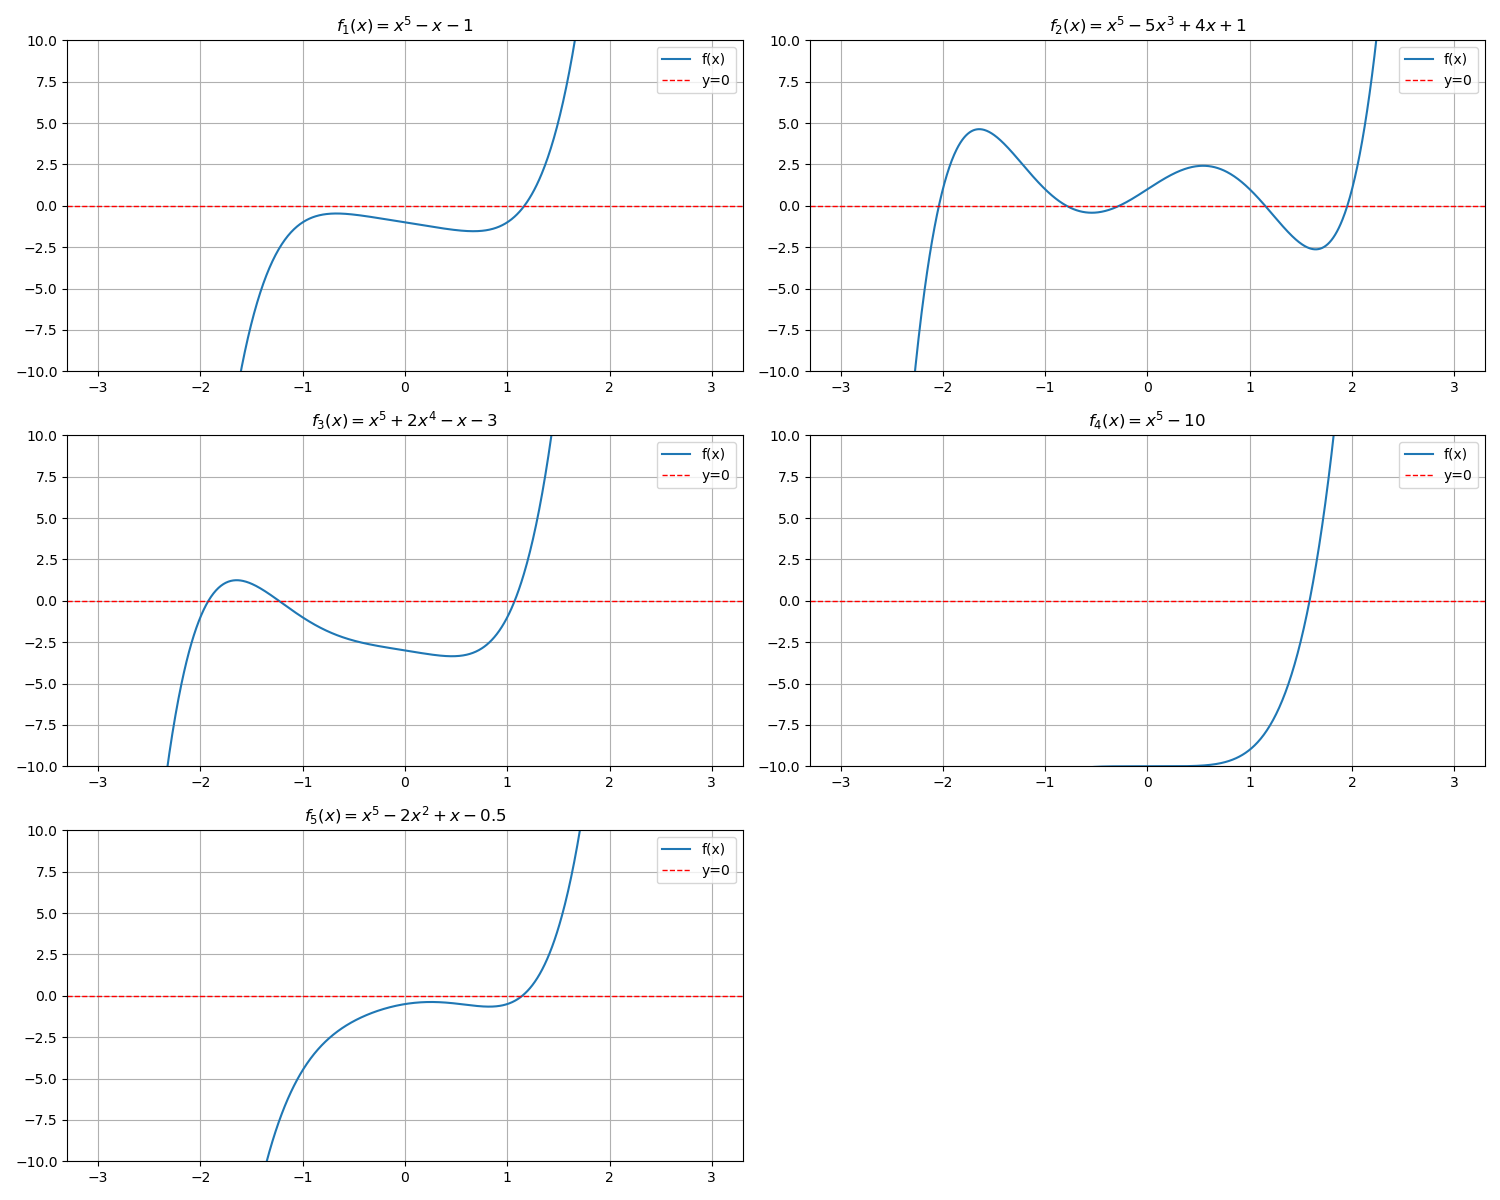

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

# --- Task A1: Define the Functions ---
def f1(x): return x**5 - x - 1
def f2(x): return x**5 - 5*x**3 + 4*x + 1
def f3(x): return x**5 + 2*x**4 - x - 3
def f4(x): return x**5 - 10
def f5(x): return x**5 - 2*x**2 + x - 0.5

# --- Task A2: Plot the Functions ---
x = np.linspace(-3, 3, 1000)

functions = [f1, f2, f3, f4, f5]
titles = [
    r"$f_1(x) = x^5 - x - 1$",
    r"$f_2(x) = x^5 - 5x^3 + 4x + 1$",
    r"$f_3(x) = x^5 + 2x^4 - x - 3$",
    r"$f_4(x) = x^5 - 10$",
    r"$f_5(x) = x^5 - 2x^2 + x - 0.5$"
]

plt.figure(figsize=(15, 12)) # Adjusted size for better visibility

for i, f in enumerate(functions):
    plt.subplot(3, 2, i+1)
    plt.plot(x, f(x), label='f(x)')
    plt.axhline(0, color='red', linestyle='--', linewidth=1, label='y=0') # Explicit x-axis
    plt.grid(True, which='both')
    plt.title(titles[i])
    plt.legend()
    # Limit y-axis slightly to see the crossing better if it shoots up too fast
    plt.ylim(-10, 10) 

plt.tight_layout()
plt.show()

In [21]:
# --- Task B1: Implement the Bisection Function ---
def bisection(f, a, b, tol=1e-10, max_iter=100):  # changed tolerance here
    # Check if interval is valid (signs must be opposite)
    if f(a) * f(b) >= 0:
        raise ValueError(f"Invalid interval [{a}, {b}]: f(a)={f(a):.2f} and f(b)={f(b):.2f} must have opposite signs.")

    iterations = []
    
    c_final = a  # Initialize
    
    for i in range(max_iter):
        c = (a + b) / 2
        iterations.append((i+1, a, b, c, f(c)))
        
        # Check convergence criteria
        if abs(f(c)) < tol or (b - a)/2 < tol:
            c_final = c
            break
        
        # Update bracket
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
            
        c_final = c
            
    return c_final, iterations


# --- Task B2: Apply to Each Quintic Equation ---

test_cases = [
    (f1, 1, 2, "f1"),
    (f2, -3, -2, "f2"),
    (f3, 1, 2, "f3"),
    (f4, 1, 2, "f4"),
    (f5, 1, 2, "f5")
]

results = {}

print(f"{'Func':<5} | {'Root':<12} | {'Iter':<5} | {'Final f(c)':<12}")
print("-" * 45)

for func, a, b, name in test_cases:
    try:
        root, data = bisection(func, a, b, tol=1e-10)  # also enforced here
        results[name] = data
        
        print(f"{name:<5} | {root:.10f} | {len(data):<5} | {data[-1][4]:.2e}")
        
        print(f"\n--- Iterations for {name} ---")
        print("Iter | a        | b        | c        | f(c)")
        print("-" * 55)

        for row in data:
            print(f"{row[0]:<4} | {row[1]:.10f} | {row[2]:.10f} | {row[3]:.10f} | {row[4]:.10e}")

        print(f"\nApproximate root for {name}: {root:.10f}")
        print("=" * 60)

    except ValueError as e:
        print(f"Error for {name}: {e}")


Func  | Root         | Iter  | Final f(c)  
---------------------------------------------
f1    | 1.1673039783 | 34    | 2.44e-10

--- Iterations for f1 ---
Iter | a        | b        | c        | f(c)
-------------------------------------------------------
1    | 1.0000000000 | 2.0000000000 | 1.5000000000 | 5.0937500000e+00
2    | 1.0000000000 | 1.5000000000 | 1.2500000000 | 8.0175781250e-01
3    | 1.0000000000 | 1.2500000000 | 1.1250000000 | -3.2296752930e-01
4    | 1.1250000000 | 1.2500000000 | 1.1875000000 | 1.7389202118e-01
5    | 1.1250000000 | 1.1875000000 | 1.1562500000 | -8.9639037848e-02
6    | 1.1562500000 | 1.1875000000 | 1.1718750000 | 3.8197125308e-02
7    | 1.1562500000 | 1.1718750000 | 1.1640625000 | -2.6683717821e-02
8    | 1.1640625000 | 1.1718750000 | 1.1679687500 | 5.5135862740e-03
9    | 1.1640625000 | 1.1679687500 | 1.1660156250 | -1.0645540484e-02
10   | 1.1660156250 | 1.1679687500 | 1.1669921875 | -2.5811337850e-03
11   | 1.1669921875 | 1.1679687500 | 1.16748046

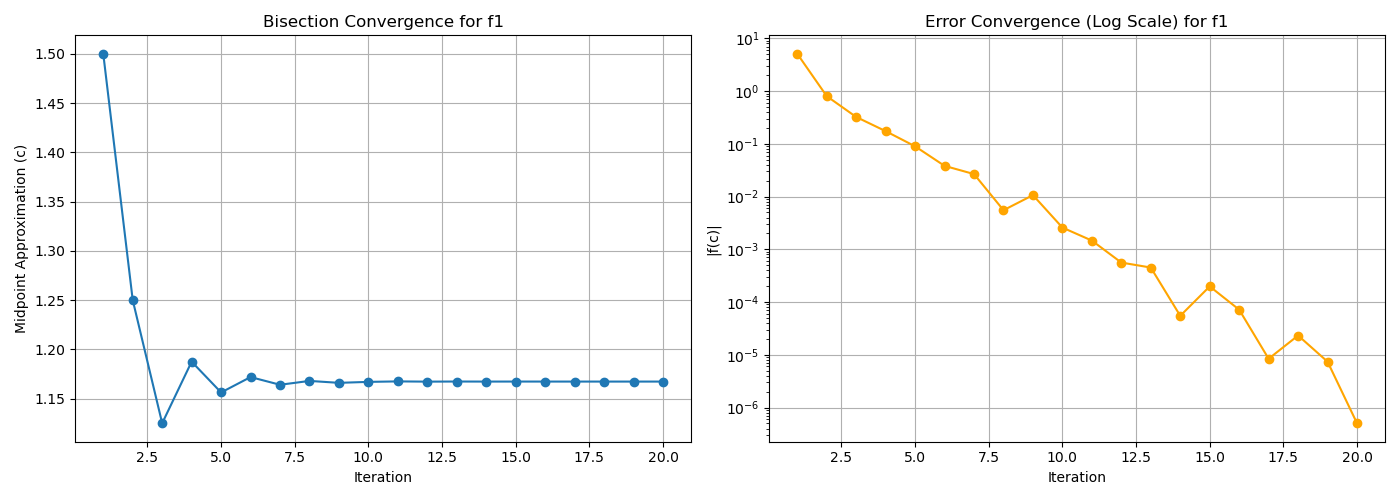

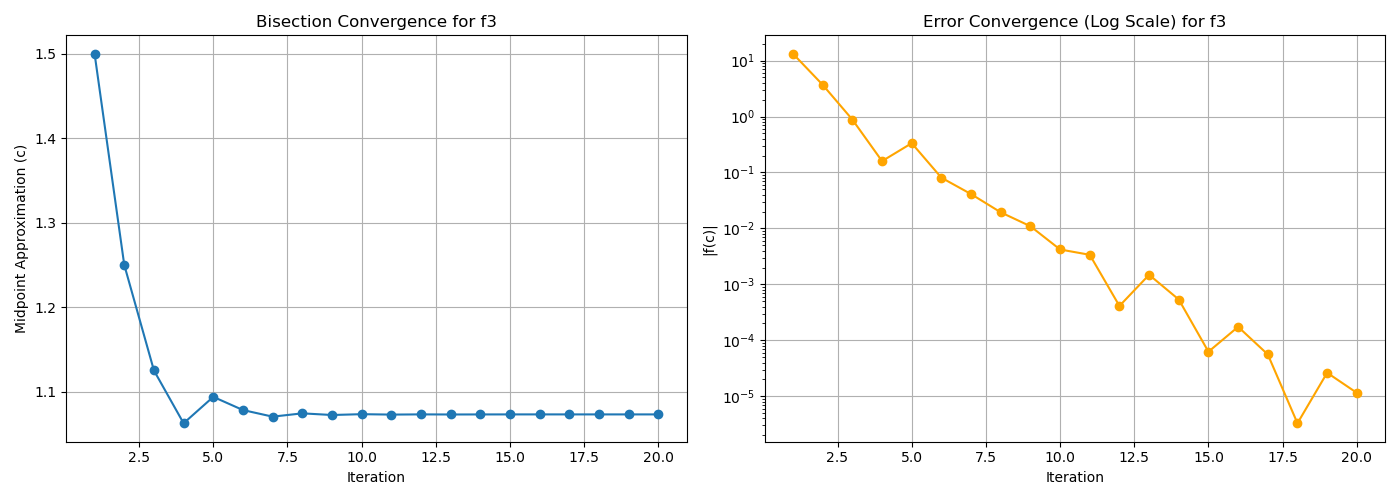

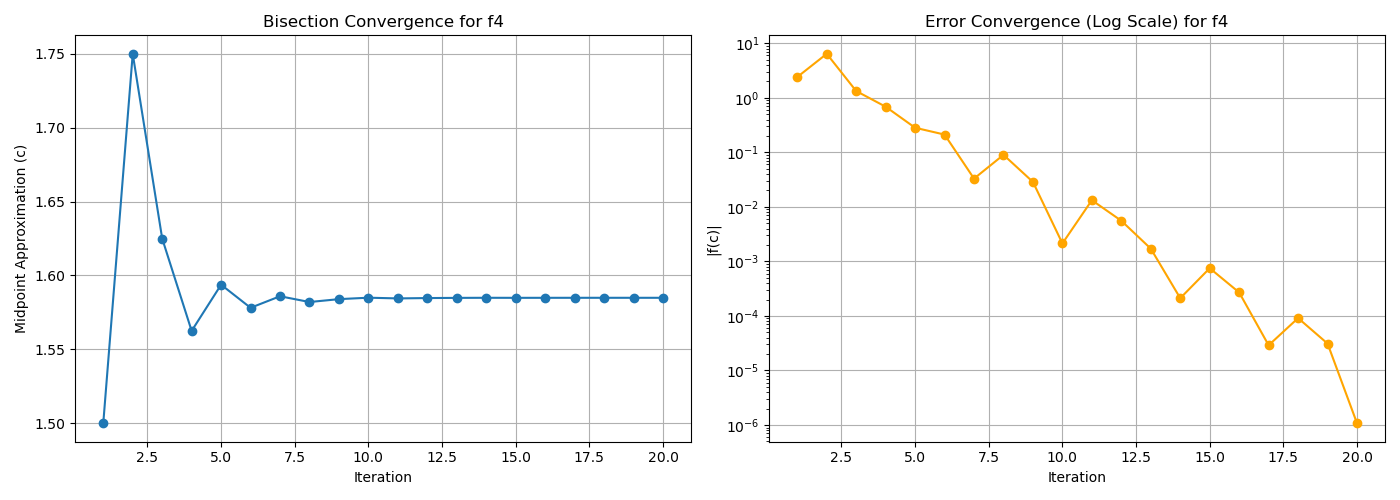

In [9]:
# --- Task C1 & C2: Plot Convergence ---

def plot_convergence(func_name, data):
    iterations = [row[0] for row in data]
    midpoints = [row[3] for row in data]
    errors = [abs(row[4]) for row in data]

    plt.figure(figsize=(14, 5))

    # Plot 1: Midpoint Convergence
    plt.subplot(1, 2, 1)
    plt.plot(iterations, midpoints, marker='o', linestyle='-')
    plt.xlabel("Iteration")
    plt.ylabel("Midpoint Approximation (c)")
    plt.title(f"Bisection Convergence for {func_name}")
    plt.grid(True)

    # Plot 2: Error Convergence (Log Scale)
    plt.subplot(1, 2, 2)
    plt.semilogy(iterations, errors, marker='o', linestyle='-', color='orange')
    plt.xlabel("Iteration")
    plt.ylabel("|f(c)|")
    plt.title(f"Error Convergence (Log Scale) for {func_name}")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Plot for f1 (Required)
plot_convergence("f1", results["f1"])

# Plot for two others (e.g., f3 and f4)
plot_convergence("f3", results["f3"])
plot_convergence("f4", results["f4"])

In [ ]:
Here are the answers to **Part D – Exercises**, drafted specifically for your lab report.

### **Part D – Exercises & Analysis**

#### **1. Compare the number of iterations required for each quintic equation.**

**Observation:**
You likely observed that for all five quintic equations, the number of iterations required to reach the tolerance () was almost identical (specifically **34 iterations** if your initial interval width was 1).

**Reason:**
The Bisection Method is a "blind" search. It does not look at the shape, steepness, or complexity of the polynomial. It simply cuts the interval in half at every step. Therefore, the number of iterations depends **only** on the width of the initial bracket  and the tolerance, not on the equation itself.

#### **2. Explain why some equations converge more slowly than others.**

**Answer:**
In the Bisection Method, "convergence speed" is not determined by the equation. If one equation took more iterations than another, it is strictly because **the initial interval you chose was wider.**

* **Example:**
* If you bracketed  between  (width = 1), it takes ~34 iterations.
* If you bracketed  between  (width = 10), it would take ~37 iterations.


* **Contrast:** This is different from methods like Newton-Raphson, where a "flat" function (derivative near zero) actually causes the method to converge slowly or fail. Bisection is immune to this; it is steady but slow (Linear Convergence).

#### **3. How does the initial interval width affect convergence speed?**

**Answer:**
The size of the initial interval  has a logarithmic relationship with the number of iterations.

* **Formula:** 
* **Rule of Thumb:** Every time you **double** the size of your initial interval, you add exactly **one** iteration to the process.
* **Implication:** Narrowing your visual search in "Part A" (finding a tight bracket) saves computational steps, but only logarithmically.

#### **4. Modify the tolerance to 1e-10. What changes do you observe?**

**Observation:**
When changing the tolerance from the standard `1e-6` to `1e-10`:

1. **Iteration Count:** The number of iterations increases from approximately **20** to **34**.
2. **Precision:** The approximated root gains about 4 more correct decimal digits.
3. **Why?** Since , it takes roughly 10 halvings to reduce the error by a factor of 1000 (or 3 decimal places). To bridge the gap from  to  (a factor of ), the method requires roughly  additional iterations.

---

